# Open example lidaco converted file

Creator: Tobias Ahsbahs

email: ttah@dtu.dk

Institution: Technical university of denmark (DTU)

Script shown at the e-WindLidar meeting on the 03.10.2018 for opening an lidaco converted file. 

It shows how a data user would experience opening and exploring the data

In [1]:
#Only for development plots
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
#%matplotlib notebook

#This is to set defaul settings
#to find all possible keys use this:
#mpl.rcParams.keys()
mpl.rcParams['figure.figsize'] = (14,7)

In [2]:
import xarray as xr
import pandas as pd

Opening the data set with xarray (http://xarray.pydata.org/)

In [59]:
ds = xr.open_dataset('./WLS7-164_2016_11_24__00_00_00.nc')

First thing seen. Data is opened 'lazy', so only metadata, dimensions, and names of variables are there.
We can see that it is a DBS measurement scenario.

In [61]:
ds

<xarray.Dataset>
Dimensions:            (range: 10, time: 113288)
Coordinates:
  * range              (range) float32 40.0 58.0 78.0 98.0 118.0 133.0 158.0 ...
  * time               (time) object '2016-11-24T00:00:00Z' ...
Data variables:
    position_x         float32 ...
    position_y         float32 ...
    position_z         float32 ...
    yaw                float32 ...
    pitch              float32 ...
    roll               float32 ...
    scan_type          int32 ...
    accumulation_time  timedelta64[ns] ...
    n_spectra          float32 ...
    VEL                (time, range) float32 ...
    azimuth_angle      (time) float32 ...
    elevation_angle    (time) float32 ...
    T_internal         (time) float32 ...
    T_external         (time) float32 ...
    p                  (time) float32 ...
    Rh                 (time) float32 ...
    CNR                (time, range) float32 ...
    WIDTH              (time, range) float32 ...
    wiper              (time) float32 ..

Loading all the data in. This is loading data into memory. Now everything is visible.

In [63]:
ds.load()

<xarray.Dataset>
Dimensions:            (range: 10, time: 113288)
Coordinates:
  * range              (range) float32 40.0 58.0 78.0 98.0 118.0 133.0 158.0 ...
  * time               (time) object '2016-11-24T00:00:00Z' ...
Data variables:
    position_x         float32 514804.0
    position_y         float32 5691869.0
    position_z         float32 254.6
    yaw                float32 -84.0
    pitch              float32 0.1
    roll               float32 -0.1
    scan_type          int32 2
    accumulation_time  timedelta64[ns] 00:00:01
    n_spectra          float32 20000.0
    VEL                (time, range) float32 0.0 -0.23 -0.52 -0.7 -0.73 ...
    azimuth_angle      (time) float32 270.0 0.0 0.0 90.0 180.0 270.0 0.0 0.0 ...
    elevation_angle    (time) float32 62.0 90.0 62.0 62.0 62.0 62.0 90.0 ...
    T_internal         (time) float32 24.6 24.5 24.5 24.5 24.5 24.5 24.5 ...
    T_external         (time) float32 9.96921e+36 9.96921e+36 9.96921e+36 ...
    p                  (tim

Finding out what is in the data. 'VEL' looks like it is a velocity. It is the radial velocity.

In [64]:
print(ds.VEL)

<xarray.DataArray 'VEL' (time: 113288, range: 10)>
array([[ 0.  , -0.23, -0.52, ..., -2.09, -1.05, -7.65],
       [-0.12, -0.15, -0.01, ..., -0.16,  0.5 ,  0.7 ],
       [-0.11, -0.03,  0.3 , ..., -0.8 , -1.92, -1.64],
       ...,
       [-0.12,  0.2 , -0.94, ..., -1.27, -1.93, -1.38],
       [ 0.45,  1.2 ,  2.22, ..., -0.7 ,  0.42,  0.64],
       [-0.31, -0.35, -1.96, ..., -3.76, -3.47, -4.31]], dtype=float32)
Coordinates:
  * range    (range) float32 40.0 58.0 78.0 98.0 118.0 133.0 158.0 198.0 ...
  * time     (time) object '2016-11-24T00:00:00Z' '2016-11-24T00:00:01Z' ...
Attributes:
    units:      m.s-1
    long_name:  radial_velocity


Trying to plot the data for the first time.

In [66]:
ds.VEL.plot(x='time',y='range',robust=True)

TypeError: Plotting requires coordinates to be numeric or dates of type np.datetime64 or datetime.datetime.

Error message tells us the the 'time' dimension cannot be plotted. There is a porblem with the convertions. 

We convert the time to a pandas datetime format.

In [67]:
ds['time'] = [pd.to_datetime(t) for t in ds.time.values]

Now plotting is possible. Due to scans in different directions in the DBS scenario type this is not very usefuls information.

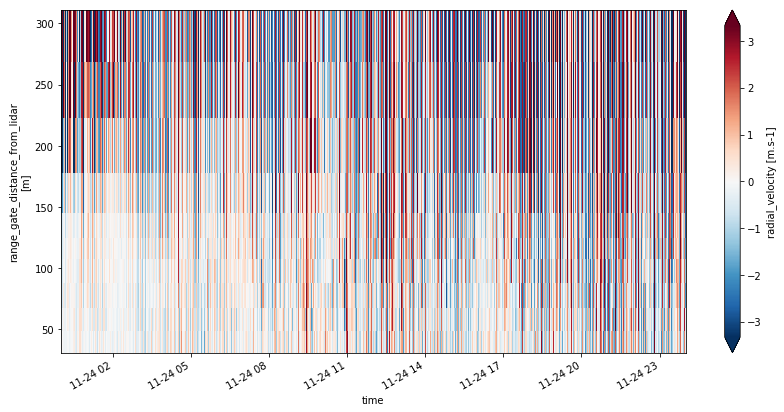

In [68]:
ds.VEL.plot(x='time',y='range',robust=True)

Looking at the first few 'azimuth_angle' and 'elevation_angle'

The azimuth angle is changing by 90 degrees.

elevtion is mostly 62 and 90 degrees pointing upwards every 5 scans

<xarray.DataArray 'azimuth_angle' (time: 10)>
array([270.,   0.,   0.,  90., 180., 270.,   0.,   0.,  90., 180.],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-11-24 2016-11-24T00:00:01 ...
Attributes:
    units:      degrees
    long_name:  azimuth_angle_of_lidar beam
<xarray.DataArray 'elevation_angle' (time: 10)>
array([62., 90., 62., 62., 62., 62., 90., 62., 62., 62.], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-11-24 2016-11-24T00:00:01 ...
Attributes:
    units:      degrees
    long_name:  elevation_angle_of_lidar beam


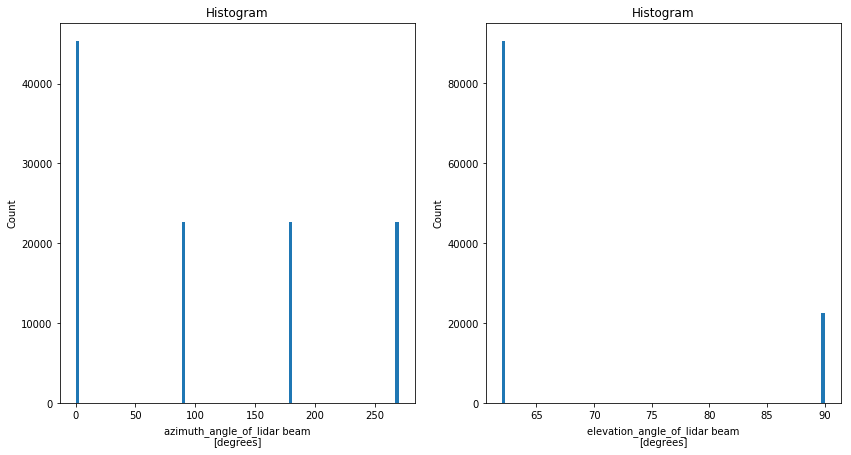

In [76]:
print(ds.azimuth_angle.isel(time=slice(0,10)))
print(ds.elevation_angle.isel(time=slice(0,10)))

fig,ax = plt.subplots(1,2)
ds.azimuth_angle.plot.hist(bins=100,ax=ax[0]);
ds.elevation_angle.plot.hist(bins=100,ax=ax[1]);

Choosing only data with azimuth 180 and elevation 62

In [109]:
ds2 = ds.where((ds.azimuth_angle == 180)&(ds.elevation_angle==62),drop=True)

plotting the second range gate (left) and a heat map of LOS (right)

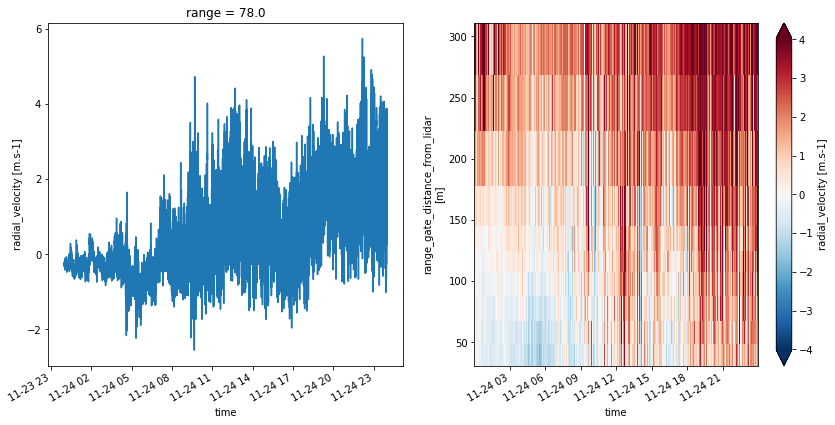

In [110]:
fig,ax = plt.subplots(1,2)
ds2.VEL.isel(range=2).plot(ax=ax[0])
ds2.VEL.plot(x='time',y='range',robust=True,ax=ax[1])

Plotting CNR histograms

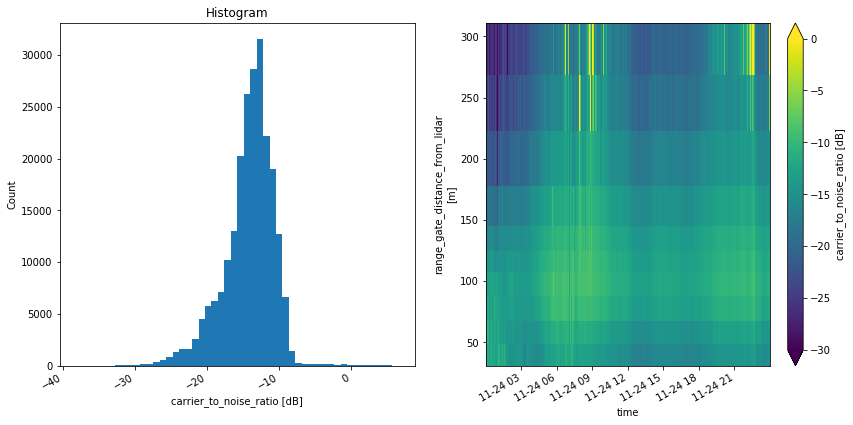

In [111]:
fig,ax = plt.subplots(1,2)
ds2.CNR.plot.hist(bins=50,ax=ax[0]);
ds2.CNR.plot(x='time',y='range',ax=ax[1],vmin=-30,vmax=0);

Filtering data above CNR above -15 (just to show how to filter)

In [112]:
ds2['VEL'] = ds2.VEL.where(-15 < ds2.CNR)

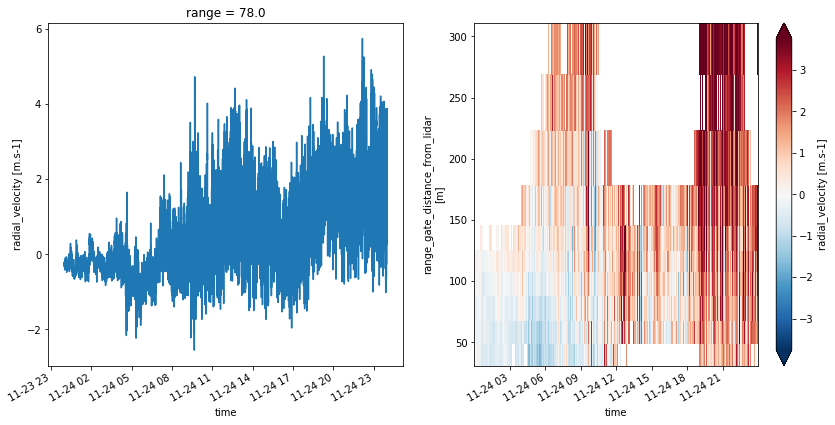

In [113]:
fig,ax = plt.subplots(1,2)
ds2.VEL.isel(range=2).plot(ax=ax[0])
ds2.VEL.plot(x='time',y='range',robust=True,ax=ax[1])

Going to pandas if you only want one particular range gate. Choosing data from 78 m as an exxample. Using the drop flag to remove the range variable because we know it's 78.

In [115]:
ds.range

<xarray.DataArray 'range' (range: 10)>
array([ 40.,  58.,  78.,  98., 118., 133., 158., 198., 248., 290.],
      dtype=float32)
Coordinates:
  * range    (range) float32 40.0 58.0 78.0 98.0 118.0 133.0 158.0 198.0 ...
Attributes:
    units:      m
    long_name:  range_gate_distance_from_lidar

In [119]:
df = ds.VEL.sel(range=78,drop=True).to_dataframe()
df[0:10]

,VEL
time,
2016-11-24 00:00:00,-0.52
2016-11-24 00:00:01,-0.01
2016-11-24 00:00:02,0.30
2016-11-24 00:00:02,0.46
2016-11-24 00:00:03,-0.30
2016-11-24 00:00:04,-0.51
2016-11-24 00:00:06,0.01
2016-11-24 00:00:06,0.33
2016-11-24 00:00:07,0.44


By default the dimensions are included as indexes. But we might want to know the azimuth_angle and elevation_angle.

A way to do this by default is adding them as "Coordinates". This makes sense because they describe where! the data was measured.

In [121]:
ds = ds.set_coords(['azimuth_angle','elevation_angle'])

Going to pandas again like before. The azimuth_angle and elevation_angle are included now, because they belong to each variable that has the dimension time.

In [122]:
df2 = ds.VEL.sel(range=78,drop=True).to_dataframe()
df2[0:10]

,azimuth_angle,elevation_angle,VEL
time,,,
2016-11-24 00:00:00,270.0,62.0,-0.52
2016-11-24 00:00:01,0.0,90.0,-0.01
2016-11-24 00:00:02,0.0,62.0,0.30
2016-11-24 00:00:02,90.0,62.0,0.46
2016-11-24 00:00:03,180.0,62.0,-0.30
2016-11-24 00:00:04,270.0,62.0,-0.51
2016-11-24 00:00:06,0.0,90.0,0.01
2016-11-24 00:00:06,0.0,62.0,0.33
2016-11-24 00:00:07,90.0,62.0,0.44
